# 감성 분석
- 수집한 텍스트 데이터에 포함된 내용의 긍정/부정 정도 파악 혹은 분류

## 기계학습을 통한 감성분석
- Naive Bayes등의 분류 모형을 통한 감성 분석

## 사전 기반 감성분석
- 감성 분석 라이브러리 활용
- 감성 사전 활용
- 감성 사전 생성

### 1. Vader 감성 분석 라이브러리 활용
- polarity_scores: 문장의 긍정 점수를 알려주는 함수
- neg부정, neu중립, pos긍정, compound합산

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [2]:
sentiment_analyzer_scores('I am happy.')

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

In [3]:
sentiment_analyzer_scores('I am very happy.')

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

In [4]:
sentiment_analyzer_scores('I am not happy.')

{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4585}

### 리뷰 감성 측정

In [5]:
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')

In [6]:
mobile.iloc[0,4]

'Phone does not work. Does not allow outgoing text . Incoming calls. Would not disable South African settings. Waste of money'

In [7]:
sentiment_analyzer_scores(mobile.iloc[0,4])

{'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.6546}

In [8]:
# 감성 스코어 컬럼 생성

sent = []

for i in range(len(mobile)):
    
    # 리뷰가 NA인 곳은 감성 스코어에 0점 부여
    if(pd.isna(mobile.iloc[i,4]) == True):
        sent.append(0)
    else:
        sent.append(sentiment_analyzer_scores(mobile.iloc[i,4])['compound'])
    
mobile['sentiment_score'] = sent
mobile.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,sentiment_score
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,-0.6546
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,-0.3467
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,-0.7003
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,0.7351
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,-0.2263


### 2. 감성 사전 활용
- 긍정 단어와 부정 단어 사전을 활용하여 문장의 긍정, 부정 감성을 구분
- 단점: 사전에 포함되어 있지 않은 단어의 긍정, 부정 정도는 파악할 수 없다
- 단어 앞에 부정어인 not이 포함되어있는 경우에는 반대로 감성점수가 매겨짐

In [11]:
import nltk
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()

nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

pos_list=set(opinion_lexicon.positive())  # 긍정 단어
neg_list=set(opinion_lexicon.negative())  # 부정 단어

pos_list

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\eunbi\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


{'multi-purpose',
 'extol',
 'adaptable',
 'charmingly',
 'agreeably',
 'illuminate',
 'delightfully',
 'issue-free',
 'luxuriate',
 'boom',
 'success',
 'devout',
 'effusiveness',
 'vivacious',
 'thank',
 'promising',
 'gorgeous',
 'striving',
 'eagerness',
 'beckoned',
 'instrumental',
 'terrific',
 'twinkly',
 'restful',
 'greatest',
 'record-setting',
 'buoyant',
 'gleefully',
 'stimulating',
 'bliss',
 'enthusiast',
 'prefers',
 'uplift',
 'awesomeness',
 'diplomatic',
 'ingenious',
 'understandable',
 'ebulliently',
 'rewarding',
 'friendly',
 'impressiveness',
 'individualized',
 'advocated',
 'affection',
 'adulatory',
 'acclaimed',
 'beautiful',
 'liberate',
 'titillate',
 'interesting',
 'blossom',
 'faithfully',
 'rock-stars',
 'significant',
 'solicitously',
 'tidy',
 'excels',
 'triumphantly',
 'renaissance',
 'pleasantly',
 'entrust',
 'raptureous',
 'nice',
 'well-wishers',
 'contrasty',
 'reliably',
 'gains',
 'intelligent',
 'truthful',
 'profoundly',
 'tenaciously',
 

In [12]:
neg_list

{'insufferably',
 'murderer',
 'famine',
 'confusing',
 'jaundiced',
 'murderous',
 'paltry',
 'damaging',
 'raging',
 'unaccessible',
 'gainsayer',
 'demise',
 'flawed',
 'fearful',
 'undermines',
 'fickle',
 'dissonance',
 'risky',
 'unnerving',
 'disappointment',
 'insubstantially',
 'inadequately',
 'aching',
 'diffidence',
 'dismaying',
 'mysterious',
 'skeletons',
 'delay',
 'ill-used',
 'freaking',
 'cloud',
 'misrepresent',
 'scorn',
 'snobby',
 'frustratingly',
 'objections',
 'smudge',
 'ultimatums',
 'swamped',
 'befoul',
 'sicken',
 'peeled',
 'shocking',
 'blistering',
 'instigators',
 'farcically',
 'doom',
 'miss',
 'worryingly',
 'obscure',
 'starkly',
 'plunder',
 'multi-polarization',
 'vice',
 'violators',
 'suspicion',
 'bruising',
 'dilapidated',
 'belittle',
 'unsafe',
 'menial',
 'scornfully',
 'tiringly',
 'sulk',
 'erode',
 'involuntary',
 'capricious',
 'errant',
 'impose',
 'obscures',
 'unwanted',
 'set-up',
 'spoon-fed',
 'cripple',
 'chide',
 'strangely',


In [13]:
from nltk.tokenize import treebank

tokenizer = treebank.TreebankWordTokenizer()

def sentiment(sentence):
    senti=0
    
    # 소문자로 변경
    words = [word.lower() for word in tokenizer.tokenize(sentence)]
    
    for word in words:
        if word in pos_list:   # 긍정단어 리스트에 있으면 +1
            senti += 1
        elif word in neg_list: # 부정단어 리스트에 있으면 -1
            senti -= 1
    return senti    # 긍정단어수 - 부정단어수 = 리뷰감성스코어

from tqdm import *

mobile['sentiment_dict'] = 0
x = len(mobile)

for i in tqdm(range(0,x)):
    if(pd.isnull(mobile.iloc[i,4])) :
        mobile.iloc[i,7] = 0
    else :
        mobile.iloc[i,7] =  sentiment(mobile.iloc[i,4])

mobile.head()

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 667.68it/s]


,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,sentiment_dict
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,-2
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,2
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,-1
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,-1


- 한글 감성 사전 활용 감성 분석

In [16]:
import json

class KnuSL():
    def data_list(wordname):
        with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
            data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        r_word = result[0]
        s_word = result[1]

        print('어근 : ' + r_word)
        print('극성 : ' + s_word)
        
        return r_word, s_word

if __name__ == "__main__":

    ksl = KnuSL

    print("\nKNU 한국어 감성사전입니다~ :)")
    print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
    print("종료하시려면 #을 입력해주세요!!!")
    print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
    print("\n")	

    while(True):
        wordname = input("word : ")
        wordname = wordname.strip(" ")
        if wordname != "#":
            print(ksl.data_list(wordname))
            print("\n")

        elif wordname == "#":
            print("\n이용해주셔서 감사합니다~ :)")
            break


KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정


word : 우울하다
어근 : 우울
극성 : -2
('우울', '-2')


word : 행복하다
어근 : 행복
극성 : 2
('행복', '2')


word : 사랑스럽다
어근 : 사랑
극성 : 2
('사랑', '2')


word : #

이용해주셔서 감사합니다~ :)


In [18]:
import json
import pandas as pd
import konlpy

endgame = pd.read_csv('data/endgame.csv')
endgame.head()

from konlpy.tag import *

okt = Okt()

endgame['sentiment'] = 0

def sent_list(wordname):
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        s_word = result[1]

        return s_word

from tqdm import *
review_length = len(endgame)

for j in tqdm(range(0, review_length)):
    words = okt.pos(endgame.iloc[j,1])
    x = len(words)
    sent_sum = 0

    for i in range(0,x):
        sent = sent_list(words[i][0])
        if( sent != 'None'):
            sent_sum += int(sent)
    
    endgame.iloc[j,2] = sent_sum

endgame.head()


100%|████████████████████████████████████████████████████████████████████████████| 4525/4525 [1:04:23<00:00,  1.17it/s]


,Rating,Text,sentiment
0,10,\n ...,2
1,10,\n ...,0
2,7,\n,0
3,0,\n,0
4,10,\n ...,4


### 3. 감성 사전 만들기
- 자신이 분석하려는 도메인에 맞는 사전이 없다면 데이터를 확보하여 사전을 스스로 만들 필요가 있다
- 리뷰를 긍정 리뷰와 부정 리뷰로 분류하는데 각 단어가 미치는 영향을 로지스틱 회귀분석을 활용하여 구할 수 있따
- 종속변수가 긍정일 때 1, 부정일 때 0이라면 각 단어가 로지스틱 회귀분석의 독립변수가 되고 계수값이 각 단어 감정 점수가 됨
- 리뷰에 단어 존재 여부가 긍정, 부정에 미치는 영향을 감성점수로 활용

In [19]:
import nltk
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()
mobile = mobile.dropna()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english'
                     ,ngram_range = (1,1),tokenizer = token.tokenize)
# ngram_range: 단어의 묶음 (최소, 최대) 묶음 인덱스

text_counts= cv.fit_transform(mobile['Texts'])
    
X = text_counts
y = mobile.iloc[:,6]

In [20]:
ridge_reg = RidgeClassifier(alpha = 1, solver="sag")
ridge_reg.fit(X,y)

ridge_reg.coef_

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:556: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


array([[-0.1194763 , -0.06110556,  0.00184742, ..., -0.01024355,
         0.00747169, -0.00253063]])

In [21]:
pred = ridge_reg.predict(X)

from sklearn.metrics import precision_score, recall_score, f1_score

#precision_score(y,pred)
#recall_score(y,pred)
f1_score(y,pred)

0.9835575485799701

In [22]:
text_counts
a = pd.DataFrame(text_counts.todense())
a 

,0,1,2,3,4,5,6,7,8,9,...,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import sklearn.feature_extraction

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
ngram_size = 1

vectorizer = sklearn.feature_extraction.text.CountVectorizer(
    lowercase=True,stop_words='english',ngram_range = (1,1),
    tokenizer = token.tokenize)

vect = vectorizer.fit(mobile['Texts'])
print('vect.get_feature_names(): {0}'.format(vect.get_feature_names()))

len(vect.get_feature_names()) # 7623

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


vect.get_feature_names(): ['0', '00', '000', '0000000', '00pm', '01', '01usd', '02', '03', '06', '08', '0gb', '1', '10', '100', '1000', '100min', '100s', '102', '1020', '1080', '1080p', '10bmp', '10conclussions', '10gb', '10mbps', '10positives', '10th', '11', '112gm', '113', '1136', '115', '11oz', '11pm', '11th', '12', '120', '1200', '122', '128', '1280', '1280x720', '1280x800', '128gb', '129', '12th', '12yr', '13', '130', '139', '13mb', '14', '140', '142cm', '143', '145', '145g', '149', '14th', '15', '150', '152', '1520', '16', '160', '1600', '1600x900', '168', '16gb', '16gbmy', '16hrs', '16mp', '16th', '17', '178', '179', '17bday', '18', '180', '1800', '189', '18th', '19', '1900', '190mb', '1920', '1920x1080', '199', '1999', '19th', '1a', '1at', '1cm', '1gb', '1hour', '1in', '1mm', '1st', '1yr', '2', '20', '200', '2000', '2001', '2007', '2008', '200k', '2010', '20101014901', '2011', '2012', '20120510035744301', '2013', '2014', '2014i', '2015', '2070', '209gm', '20ea', '20mb', '20mp',

7623

In [24]:
vect.get_feature_names()[np.argmax(ridge_reg.coef_)] 

'thank'

In [25]:
vect.get_feature_names()[np.argmin(ridge_reg.coef_)] 

'horrible'

## 토픽 모델링
- 잠재 디리클레 할당 (Latent Dirichlet Allocation, LDA): 말뭉치로부터 토픽을 추출하는 토픽모델링 기법 중 하나
- 주어진 문서에 대해 각 문서에 어떤 주제들이 존재하는지에 대한 확률 모형
- 토픽별 단어의 분포, 문서별 토픽의 분포를 모두 추정

1. LDA는 특정 토픽에 특정 단어가 나타날 확률 계산 (문서의 토픽 비중 또한 LDA의 산출 결과물)
2. 최적 토픽 수 찾기 (LDA의 토픽수 K는 사용자가 지정하는 하이퍼파라미터), 토픽들이 자신의 분석목적에 잘 부한하는 지 판단하여 최적의 토픽수 정함 / Perplexity 구한 뒤 가장 작은 값을 나타내는 K를 최적의 토픽수로 판단하기도 함

In [39]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools (LDA 결과 시각화)
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/mobile2014.csv')
df.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0


In [40]:
# 리스트로 변환
data = df.Texts.values.tolist()

pprint(data[:1])

['Phone does not work. Does not allow outgoing text . Incoming calls. Would '
 'not disable South African settings. Waste of money']


In [41]:
# 영어 리뷰에서 단어로 분할해 주는 함수

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(data)) 
print(data_words[:1])

[['phone', 'does', 'not', 'work', 'does', 'not', 'allow', 'outgoing', 'text', 'incoming', 'calls', 'would', 'not', 'disable', 'south', 'african', 'settings', 'waste', 'of', 'money']]


In [42]:
## 표제어 추출 함수 (명사, 형용사, 동사, 부사)

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [43]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
# For windows: pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-deps

In [60]:
spacy.cli.download('en')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✘ Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\eunbi\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\eunbi\Anaconda3\lib\site-packages\spacy\data\en
⚠ Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


In [62]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# 원래 en_core_web_sm가 아니라 en이었음

data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:2])

['phone work allow outgoing text incoming call would disable south african setting waste money', 'satisfied iphone buy unlocked iphone one recieve unlocked more could tell how will solve problem despiste decision want tell completely satisfied product']


In [63]:
# 빈도 기반 단어 문서 매트릭스 생성

vectorizer = CountVectorizer(
    analyzer='word',
    min_df=10, #  최소 등장 회수 10회 이상 단어
    stop_words='english', # 영어 불용어 제거
    lowercase=True, # 소문자로 변경                                                
    token_pattern='[a-zA-Z0-9]{2,}'
)

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [64]:
# 토픽 10개 LDA 실행

NUM_TOPICS = 10
lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    max_iter=10,
    learning_method='online',
    random_state=100,
    batch_size=128,
    evaluate_every = -1,
    n_jobs = -1,               
)

lda_output = lda_model.fit_transform(data_vectorized)

In [65]:
log = lda_model.score(data_vectorized)
print(log)

-287209.86271066975


In [66]:
per = lda_model.perplexity(data_vectorized)
print(per)

414.3056198193998


In [67]:
# 문서별 대표 토픽 및 토픽에 속할 확률

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.610000,9
Doc1,0.010000,0.010000,0.280000,0.010000,0.010000,0.010000,0.290000,0.010000,0.390000,0.010000,8
Doc2,0.010000,0.440000,0.330000,0.170000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1
Doc3,0.010000,0.080000,0.010000,0.010000,0.870000,0.010000,0.010000,0.010000,0.010000,0.010000,4
Doc4,0.020000,0.020000,0.020000,0.020000,0.850000,0.020000,0.020000,0.020000,0.020000,0.020000,4
Doc5,0.010000,0.010000,0.390000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.570000,9
Doc6,0.010000,0.010000,0.010000,0.940000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,3
Doc7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.910000,9
Doc8,0.000000,0.000000,0.160000,0.000000,0.640000,0.000000,0.090000,0.100000,0.000000,0.000000,4
Doc9,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,2


In [68]:
# 토픽에 속한 단어 

def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['money', 'waste', 'work', 'cellphone', 'signal', 'day', 'don',
        'complain', 'time', 'receive', 'return', 'equipment', 'sell',
        'spend', 'crash'], dtype='<U13'),
 array(['new', 'apple', 'easy', 'smartphone', 'device', 'line', 'store',
        'iphone', 'tell', 'upgrade', 'right', 'brand', 'use', 'number',
        'buy'], dtype='<U13'),
 array(['phone', 'good', 'new', 'recommend', 'buy', 'purchase', 'great',
        'use', 'say', 'problem', 'price', 'come', 'need', 'receive',
        'product'], dtype='<U13'),
 array(['phone', 'screen', 'use', 'small', 'little', 'good', 'look',
        'make', 'big', 'able', 'note', 'button', 'year', 'change', 'want'],
       dtype='<U13'),
 array(['phone', 'just', 'battery', 'charge', 'work', 'buy', 'bad', 'day',
        'use', 'make', 'good', 'screen', 'turn', 'hour', 'month'],
       dtype='<U13'),
 array(['excellent', 'battery', 'product', 'phone', 'gift', 'work', 'buy',
        'ship', 'quality', 'send', 'want', 'charger', 'fre

In [69]:
# 토픽 모델링 결과 시각화

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.012595  0.015998       1        1  24.714251
2     -0.082658 -0.002093       2        1  17.641158
8     -0.178243  0.154624       3        1  15.631895
9     -0.051039 -0.069321       4        1  12.675035
7     -0.068674  0.055051       5        1   7.932449
3     -0.137864  0.097752       6        1   7.185508
6      0.017575 -0.252263       7        1   5.186182
1      0.028039 -0.202086       8        1   3.906263
5      0.136424  0.090377       9        1   3.063423
0      0.349034  0.111961      10        1   2.063837, topic_info=        Term         Freq        Total Category  logprob  loglift
438    money   263.000000   263.000000  Default  30.0000  30.0000
500    phone  4007.000000  4007.000000  Default  29.0000  29.0000
805     work   745.000000   745.000000  Default  28.0000  28.0000
293    great   572.000000   572.000000  Default  27.0000  27.0000
400     love   397.000000   397.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
748      try    11.492243   213.928249  Topic10  -4.4495   0.9566
711     talk     6.193003   118.594891  Topic10  -5.0678   0.9283
539  problem     8.848524   247.676313  Topic10  -4.7109   0.5487
50   battery     8.882587   448.228063  Topic10  -4.7071  -0.0406
463   number     2.303564    82.993128  Topic10  -6.0567   0.2963

[558 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         6  0.949092  ability
1         4  0.039514     able
1         6  0.533442     able
1         7  0.345749     able
1         9  0.069150     able
...     ...       ...      ...
812       4  0.361995     year
812       5  0.025403     year
812       6  0.317539     year
813       4  0.314831  youtube
813       7  0.692627  youtube

[1107 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 9, 10, 8, 4, 7, 2, 6, 1])

In [70]:
# 최적 토픽 수 찾기 - Perplexity 

log_list = []
per_list = []
k_list = []
for i in range(2,21):
    NUM_TOPICS = i
    lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,               
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        n_jobs = -1,               
                    )
    lda_output = lda_model.fit_transform(data_vectorized)
    log = lda_model.score(data_vectorized)
    per = lda_model.perplexity(data_vectorized)
    log_list.append(log)
    per_list.append(per)
    k_list.append(NUM_TOPICS)
    print(NUM_TOPICS)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


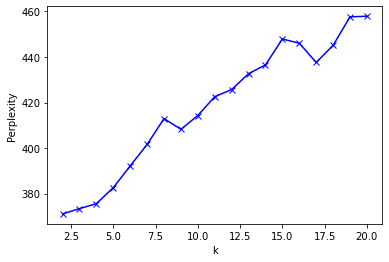

In [71]:
df = pd.DataFrame({'k': k_list, 'log': log_list, 'perplexity': per_list})

plt.plot(df.k, df.perplexity, 'bx-')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.show()

- 토픽 수가 작을 수록 perplexity 지표 값이 낮으므로 작은 수를 토픽 수로 선정하여야 한다. 
- 2부터 6까지는 perplexity 값이 큰 차이가 있지는 않으므로 각각의 경우에 따라 토픽을 구해보고 적합한 토픽 수를 파악해야 한다. 

### 연습문제 (1)

- 속성기반 감성 점수 분석 방안은 “구매후기 한 줄에 고객의 이런 속마음이” 마케팅 난제, 속 시원히 풀어주는 분석 (동아비즈니스리뷰, 2018년 11월 Issue 2) ^[https://dbr.donga.com/article/view/1202/article_no/8891]^를 참조하면 많은 인사이트를 얻을 수 있다. 

- 분석을 위해서 화장품 리뷰 사이트인 글로우픽에서 이니스프리의 ‘스킨 클리닉 마스크 - 마데카소사이드’ (https://www.glowpick.com/product/41100)에 대한 리뷰 100개를 수집하였다. 
- 글로우픽은 제품에 대한 평가를 긍정적인 것 부터 부정적인 것 까지 짱짱!, 굿굿!, 쏘쏘!, 별로!, 최악! 으로 분류하고 있는데, 각각 20개씩의 리뷰를 수집하였다.

- 해당 제품의 속성 간단하게 보습, 제형, 트러블로 구분했고 각 속성에 해당하는 단어는 임의로 다음과 같이 설정하였다. 속성의 구분과 속성에 해당하는 단어의 선정은 해당 분야의 전문가가 등장하는 단어들을 가지고 설정하면 된다. 

- 보습(humid): 보습, 촉촉, 진정, 수분
- 제형(material): 제형, 팩, 크림, 액체
- 트러블(trouble): 여드름, 뾰루지, 좁쌀, 트러블

- 수집한 리뷰 beauty.csv를 불러들여서 한 리뷰를 문장으로 나누고, 문장을 형태소로 구분한다. 각 형태소가 속성 단어에 매칭되는 수를 가지고, 해당 리뷰는 가장 많이 매칭되는 속성에 분류한다. 그 후에 문장에 대한 감성 점수를 계산하고 속성에 분류된 리뷰들의 감성 점수 평균을 구하는 방안이다. 

In [72]:
import numpy as np
import pandas as pd
import json
from tqdm import *

# url = 'https://www.glowpick.com/product/41100'
beauty = pd.read_csv('data/beauty.csv')
beauty.head()

,review,rating
0,이거 진짜 좋아여!! 피부에 뭐 안좋은거가 생기면 진짜 기달리기 바쁜데 이건 한번 ...,5
1,이번에 여드름이랑 뾰루지가 폭팔해서 너무스트레스였습니다..ㅠㅠ평소잘쓰던 스킨케어가 ...,5
2,"사용감은 얘가 최고에요. 끈적이지 않고, 진정과 수분공급도 가능한데 가격까지 상대적...",5
3,"수부지, 지성, 트러블, 홍조, 속당김은 무조건 얘에요 얘! 환절기에 가을로접어들면...",5
4,마이원앤온리마스크팩..! 흑흑 정말 너무 좋습니다 티트리가 잘 안맞는 피부라 트러블...,5


In [73]:
from konlpy.tag import *

okt = Okt()

humid = ['보습','촉촉','진정','수분']
material = ['제형','팩','크림','액체']
trouble = ['여드름','뾰루지','좁쌀','트러블']

def sent_list(wordname):
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        s_word = result[1]

        return s_word

# 문장 구분 
from nltk.tokenize.punkt import PunktSentenceTokenizer

sentence_splitter = PunktSentenceTokenizer()
sentences = sentence_splitter.tokenize(beauty.iloc[0,0])
sentences

['이거 진짜 좋아여!!',
 '피부에 뭐 안좋은거가 생기면 진짜 기달리기 바쁜데 이건 한번 사용하면 바로 없어지니깐 진짜 좋아요!!!',
 '친구가 추천해줘서 사용해봤는데 진짜 좋은게 맞는것같아요!!!',
 '진짜 모두 사용해보세여!',
 '!']

In [74]:
# 형태소 분석
for sentence in sentences :
    print(okt.morphs(sentence))

## 속성 감성 스코어 계산

hu = []
ma = []
tr = []
var_names = ['h', 'm', 't']

for i in tqdm(range(len(beauty))):
    sentences = sentence_splitter.tokenize(beauty.iloc[i,0])

    for sentence in sentences :
        h = 0
        m = 0
        t = 0
        words = okt.morphs(sentence)
    
        for word in words:
            if(word in humid):
                h += 1
        
            if(word in material):
                m += 1
            
            if(word in trouble):
                t += 1
        
        words = okt.pos(sentence)
        x = len(words)
        sent_sum = 0

        for i in range(0,x):
            sent = sent_list(words[i][0])
            if( sent != 'None'):
                sent_sum += int(sent)
        
        #lambda is a small anonymous function
        # zip var_names, values and then max 
        max_var = max(zip(var_names, (map(eval, var_names))), key=lambda tuple: tuple[1])[0]
        
        # tied is not considered to make it simple
        if (max_var == 'h'):
            if( h > 0):
                hu.append(sent_sum)
        elif (max_var == 'm'):
            if( m > 0):
                ma.append(sent_sum)
        elif (max_var == 't'):
            if( t > 0):
                tr.append(sent_sum)

print(np.mean(hu)) 
print(np.mean(ma)) 
print(np.mean(tr)) 

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

['이', '거', '진짜', '좋아여', '!!']
['피부', '에', '뭐', '안좋은', '거가', '생기', '면', '진짜', '기', '달리기', '바쁜데', '이건', '한번', '사용', '하면', '바로', '없어지니깐', '진짜', '좋아요', '!!!']
['친구', '가', '추천', '해줘서', '사용', '해봤는데', '진짜', '좋', '은', '게', '맞는것', '같아요', '!!!']
['진짜', '모두', '사용', '해보세여', '!']
['!']


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:35<00:00,  2.16s/it]

0.5454545454545454
0.13636363636363635
0.25


- 문장을 기준으로 보습 humid, 제형 material, 트러블 trouble에 속한 단어의 수를 세고 세 분야중에서 가장 많은 단어가 포함된 속성으로 문장을 분류한다. 
해당 문장의 감성점수를 계산하여 각 속성의 감성값에 넣어주며, 모든 리뷰에 대한 계산이 종료된 후에 각 속성별 평균 감성 점수 값을 구하였다. 

### 연습문제 (2)

In [75]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/endgame.csv')
df.head()

,Rating,Text
0,10,\n ...
1,10,\n ...
2,7,\n
3,0,\n
4,10,\n ...


In [76]:
# Convert to list
data = df.Text.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' 마무리까지 완벽했다 그 전 인피니티워의 감동과 대적할만한 내 인생 히어로물 희대의 명작 중 하나!! ']


<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<ipython-input-76-4d44c71e79a9>:5: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [77]:
# 엔드게임 리뷰에서 명사만 추출 

from konlpy.tag import *
from nltk import Text

okt = Okt()

data_morph = []
for i in range(len(data)):
    data_morph.append(" ".join(okt.nouns(data[i])))

data_morph

['마무리 그 전 인피니티 워 감동 대적 내 인생 히어로 물 대의 명작 중 하나',
 '토니스타크 인생 명작',
 '',
 '',
 '마블 영화 마지막 종지부 영화 가슴 웅장 실화 마블 전설 그 마블 영웅 강해진 습보 내 감격',
 '진짜 마블 마블',
 '집 진짜 꿀잼',
 '더 이상 어쩌라구',
 '',
 '댓글 그냥 점주 니 영화 평가 수준',
 '와칸 포에버',
 '나 빽 투 더 퓨쳐 캡틴 마블',
 '마지막 아이언맨 슬픔',
 '고인 명복',
 '볼거리 천국',
 '',
 '블랙 팬서',
 '',
 '명복',
 '명작',
 '반지의제왕 이후 시리즈 물 최고 마블 시리즈 나 청춘 안녕',
 '',
 '자식새끼 지구 역사상 전세계 불멸 신화 창조 판타지 액션영화 티켓 지네 가게 저녁식사 제공 판국 도리어 그냥 보지 튀어 만행 정신병 싸이코패스 새끼 때문 코로나 바이러스 도둑 놈 새끼 집안 몰살 이 영화 처럼 지구 전체 인류 절반 이 바이러스 파멸 저주',
 '최고',
 '',
 '떡 영화 애니메이션 영환',
 '도입 부가 시간',
 '예고편 인피니티 워 생각 설정 구멍 떡밥 등 눈 부분 후속작 개편 수',
 '아이언맨 왜',
 '시간 자본 부어 백투더퓨쳐',
 '',
 '다시 보아 재미나 스타크 죽 별',
 '팬서비스 하나 영화 엔딩 작품 유종 보기 점 정도 영화',
 '',
 '세계 히어로 물이 그동안 떡밥 한번 정리 왜 인피니티 워 스트 레인지 토니',
 '',
 '전혀 유종 블록버스터 영화 역대 시리즈',
 '',
 '상영 시간 금방 삭제 마법 경험 함',
 '영화',
 '아이언맨',
 '유종 생각 함',
 '굿',
 '인생 최고 영화',
 '',
 '',
 '내 평생 둘 최고 중 최고 불후 인생 영화 개념 사기꾼 쓰레기 집안 파파 보이 친구 녀석 내 티켓 먹튀 바람 나 개인 인류 절반 것 더 더욱 대재앙 저런 새끼 때문 하나님 전체 코로나바이러스 재난 저주 리신 것 동해 애비 뭐 도둑 놈',
 '평점 테러 안녕 어벤져스',
 '내 최고 영화',
 

In [78]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=5                         
                             # max_features=50000,             
                            )

data_vectorized = vectorizer.fit_transform(data_morph)


NUM_TOPICS = 5
lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,              
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        #n_jobs = -1,               
                    )
lda_output = lda_model.fit_transform(data_vectorized)
log = lda_model.score(data_vectorized)
per = lda_model.perplexity(data_vectorized)
print(NUM_TOPICS)

5


In [79]:
print(log)
print(per)

-98623.86108916388
351.70419186649747


In [80]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.530000,0.150000,0.020000,0.280000,0.020000,0
Doc1,0.070000,0.070000,0.070000,0.730000,0.070000,3
Doc2,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc3,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc4,0.470000,0.020000,0.470000,0.020000,0.020000,0
Doc5,0.350000,0.050000,0.500000,0.050000,0.050000,2
Doc6,0.730000,0.070000,0.070000,0.070000,0.070000,0
Doc7,0.600000,0.100000,0.100000,0.100000,0.100000,0
Doc8,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc9,0.030000,0.030000,0.870000,0.030000,0.030000,2


In [81]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['아이언맨', '마지막', '감동', '진짜', '캡틴', '지루함', '스토리', '마블', '영웅', '액션',
        '눈물', '이상', '어벤저스', '시작', '드라마'], dtype='<U6'),
 array(['부분', '생각', '느낌', '인피니티', '다시', '초반', '캡틴마블', '전투씬', '토니', '아쉬움',
        '정리', '후반', '중반', '조금', '여운'], dtype='<U6'),
 array(['영화', '마블', '기대', '마무리', '그냥', '정말', '히어로', '스토리', '역시', '사랑',
        '모든', '보고', '대한', '라면', '이건'], dtype='<U6'),
 array(['어벤져스', '최고', '영화', '시간', '마블', '시리즈', '처음', '노스', '완전', '진짜',
        '인생', '별로', '작품', '내용', '개인'], dtype='<U6'),
 array(['영화', '사람', '장면', '정도', '재미', '평점', '시리즈', '이해', '액션', '마블', '보고',
        '중간', '이야기', '실망', '이제'], dtype='<U6')]

In [82]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.142679  0.036092       1        1  23.508903
4     -0.137338  0.089743       2        1  22.897354
0     -0.000043 -0.354576       3        1  21.783168
3     -0.098435  0.144923       4        1  17.965600
1      0.378496  0.083818       5        1  13.844976, topic_info=     Term         Freq        Total Category  logprob  loglift
350  어벤져스   320.000000   320.000000  Default  30.0000  30.0000
381    영화  1186.000000  1186.000000  Default  29.0000  29.0000
545    최고   239.000000   239.000000  Default  28.0000  28.0000
162   마지막   263.000000   263.000000  Default  27.0000  27.0000
328  아이언맨   267.000000   267.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
451  인피니티    76.717349   121.370623   Topic5  -3.4131   1.5185
259    생각    83.811774   138.757623   Topic5  -3.3246   1.4731
363  엔드게임    33.182578    95.227208   Topic5  -4.2512   0.9230
68    그동안    27.091393    58.125524   Topic5  -4.4540   1.2139
639   히어로    24.437368   187.050305   Topic5  -4.5571  -0.0580

[254 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         5  0.937318   가망
3         3  0.942246   가슴
16        2  0.277705   감동
16        3  0.720151   감동
19        5  0.945153   감성
...     ...       ...  ...
639       1  0.502539  히어로
639       2  0.005346  히어로
639       3  0.187115  히어로
639       4  0.176423  히어로
639       5  0.128308  히어로

[266 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])